# Laboratorio 6 (League of Legends) - Inteligencia Artificial
Autores: Stefano Aragoni, Carol Arévalo, Luis Santos

### Task 1.0: Exploración y Limpieza de Datos
Como primer paso, se importa el archivo a través de distintas librerías. 

In [2]:
# Importar librerías 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Cargar el dataset
data = pd.read_csv('lol.csv')

# Imprimir las primeras 5 filas
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


##### Datos Faltantes
En este caso, primero se analizó si hacían falta datos en el dataset. En este caso, todos los datos estaban almacenados y no habían datos fuera de lugar. 

Index([], dtype='object')

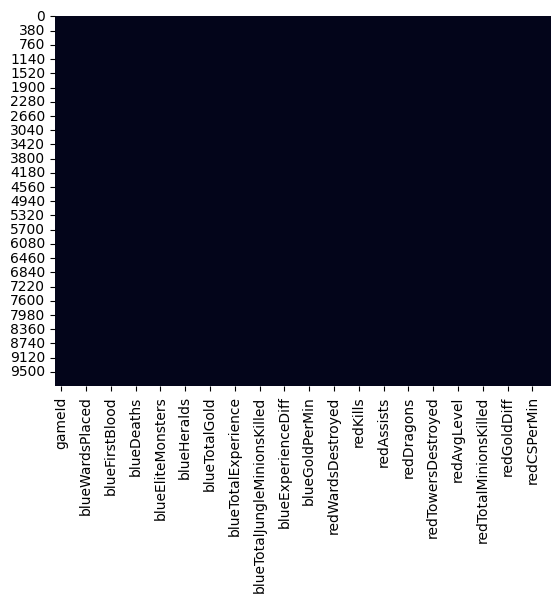

In [3]:
# Matriz de datos faltantes
sns.heatmap(data.isnull(), cbar=False)

# Mostrar columnas con datos faltantes, o con datos fuera de lugar (como un string en columna numérica)
data.columns[data.isnull().any()]

In [4]:
# Revisa valores faltantes en el dataset
data.columns[data.isnull().any()]

Index([], dtype='object')

##### Encoding
En este caso, no se necesita hacer encoding de ninguna variable debido a que las variables todas son numericas. Asimismo, los valores de las mismas son aceptables así como están. No es como en SVM donde se necesitaba tener valores -1 o 1, por ejemplo.

In [5]:
# Imprimir columas que no sean numéricas
print('Columnas categóricas:\n',data.select_dtypes(exclude=[np.number]).dtypes)

data.tail()

Columnas categóricas:
 Series([], dtype: object)


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8
9878,4523772935,1,18,0,1,6,6,5,0,0,...,0,15339,6.8,17379,201,46,-927,58,20.1,1533.9


##### Balanceo
En este caso, primero se determinó la proporción de datos correspondiente. Como se puede ver a continuación, los datos están casi balanceados, por lo cual se procedió a balancearlos.

In [6]:
# Calcular cuantas columnas son ganar y cuantas no
print('Número de ganar:',data[data['blueWins'] == 1].shape[0])
print('Número de perder:',data[data['blueWins'] == 0].shape[0])


from imblearn.over_sampling import SMOTE

# Separar las características y la variable objetivo
X_temp = data.drop('blueWins', axis=1)
y_temp = data['blueWins']

# Aplicar SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_temp, y_temp)

# Contar los valores de cada clase
print('\nNúmero de ganar balanceado:', sum(y_resampled == 1))
print('Número de perder balanceado:', sum(y_resampled == 0))

data = pd.concat([X_resampled, y_resampled], axis=1)

Número de ganar: 4930
Número de perder: 4949

Número de ganar balanceado: 4949
Número de perder balanceado: 4949


##### Escalar
En este caso, se utilizó la librería de SKLearn para poder escalar y normalizar los datos que lo necesitaran. Asimismo, también se hizo un análisis pre y post escalamiento para determinar la distribución de los datos. En el preprocesamiento, se podía observar cómo ciertas variables tenían una alta desviación estándar a comparación de su respectiva media. Esto fue solucionado a través de la función de StandardScaler(). 

> Asimismo, es importante mencionar que la normalización de datos es importante para, según Microsoft, "tener datos que usan una escala común, sin distorsionar las diferencias en los intervalos de valores ni perder información". https://learn.microsoft.com/es-es/azure/machine-learning/component-reference/normalize-data

Para otros modelos, la normalización de datos permite asegurar que las variables tengan en mismo peso y que no se le de prioridad a una ni a otra. Esto considerando que otros modelos normalmente toman en cuenta distancias, por ejemplo. En este caso, esto no es necesario. Sin embargo, aún se normalizó para darle continuidad a los datos.  


In [7]:
# Calcular media y desviación estándar de cada columna
print('\n\nMedia y desviación estándar de cada columna:')
data.describe()



Media y desviación estándar de cada columna:


,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueWins
count,9.898000e+03,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,...,9898.000000,9898.000000,9898.00000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000,9898.000000
mean,4.500073e+09,22.278743,2.823803,0.504748,6.185896,6.135280,6.645585,0.549404,0.361689,0.187715,...,16487.891291,6.925109,17961.28036,217.336533,51.312689,-17.518084,31.851889,21.733747,1648.789232,0.500000
std,2.757986e+07,18.004350,2.173785,0.500003,3.010036,2.933224,4.062395,0.625350,0.480514,0.390504,...,1490.637169,0.305286,1198.44564,21.904968,10.022654,2453.642678,1920.418061,2.190472,149.063698,0.500025
min,4.295358e+09,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11212.000000,4.800000,10465.00000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000,0.000000
25%,4.483197e+09,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,...,15427.000000,6.800000,17209.00000,203.000000,44.000000,-1603.000000,-1213.750000,20.300000,1542.700000,0.000000
50%,4.510921e+09,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,...,16378.000000,7.000000,17973.00000,218.000000,51.000000,-16.500000,27.000000,21.800000,1637.800000,0.500000
75%,4.521723e+09,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,...,17415.750000,7.200000,18763.75000,233.000000,57.000000,1579.000000,1289.000000,23.300000,1741.575000,1.000000
max,4.527991e+09,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,...,22732.000000,8.200000,22269.00000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000,1.000000


In [8]:
# Libreía para escalar los datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data.drop('blueWins',axis=1))

# Escalar los datos
scaled_features = scaler.transform(data.drop('blueWins',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])

# Agregar la columna de status
df_feat['blueWins'] = data['blueWins']

df_feat.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueWins
0,0.692021,0.317787,-0.378991,0.990548,0.934954,-0.046122,1.071938,-0.878599,-0.752752,-0.480723,...,0.053073,-0.409831,-0.762927,-0.928445,0.367916,-0.254933,-0.012421,-0.928498,0.053072,0
1,0.844826,-0.570932,-0.839041,-1.009542,-0.394001,-0.387061,-0.405098,-0.878599,-0.752752,-0.480723,...,0.759518,-0.409831,-0.436655,1.034679,0.068579,1.192377,0.594249,1.034648,0.759517,0
2,0.776025,-0.404297,-1.299091,-1.009542,0.270477,1.658573,-0.651271,0.720587,1.328459,-0.480723,...,0.534771,-0.409831,-0.590195,-0.654521,-2.326117,0.484821,0.521344,-0.654571,0.534770,0
3,0.881525,1.150961,-0.839041,-1.009542,-0.726239,-0.387061,-0.405098,0.720587,-0.752752,2.080200,...,-0.006636,0.245325,-0.000234,0.806409,-0.430316,0.545550,-0.012942,0.806375,-0.006637,0
4,-2.322072,2.928399,0.541110,-1.009542,-0.061762,-0.046122,-0.158925,-0.878599,-0.752752,-0.480723,...,0.614606,0.245325,0.293495,0.349868,1.565264,0.416348,-0.136358,0.349830,0.614606,0


##### Selección de Variables

Finalmente, se quiso determinar la correlacion entre las variables con blueWins para poder elegir las variables que se utilizarán en el modelo. Esto es importante ya que cabe destacar que no todas las variables son útiles, y que pueden existir algunas que únicamente causen ruido. A continuación, como se puede observar, las variables que más correlación tienen con un equipo ganando o perdiendo son:

1. blueTotalExperience         
2. blueTotalGold               
3. blueGoldPerMin               
4. blueExperienceDiff           
5. blueGoldDiff                    

También se tienen otras variables de correlación negativa, que posiblemente indican si el equipo azul pierde. 
1. redGoldDiff             
2. redExperienceDiff           
3. redTotalGold             
4. redGoldPerMin              
5. redTotalExperience       

Sin embargo, en este caso se utilizarán las variables más altas de cada subconjunto. Para que la combinacion deje determinar quien gana.

In [9]:
# Correlación entre las columnas y el status
df_feat.corr()['blueWins'].sort_values()

redGoldDiff                    -0.511341
redExperienceDiff              -0.489526
redTotalGold                   -0.411447
redGoldPerMin                  -0.411446
redTotalExperience             -0.387263
redAvgLevel                    -0.352157
blueDeaths                     -0.339527
redKills                       -0.339527
redAssists                     -0.271590
redEliteMonsters               -0.222131
redTotalMinionsKilled          -0.212408
redCSPerMin                    -0.212368
redDragons                     -0.210358
redFirstBlood                  -0.203084
redTotalJungleMinionsKilled    -0.110878
redTowersDestroyed             -0.103973
redHeralds                     -0.097298
redWardsDestroyed              -0.056249
redWardsPlaced                 -0.024077
blueWardsPlaced                -0.000443
gameId                          0.000581
blueWardsDestroyed              0.043690
blueHeralds                     0.091591
blueTowersDestroyed             0.115046
blueTotalJungleM

In [10]:
# Eliminar las columnas con correlación menor a 0.40
variables = df_feat.corr()['blueWins'].sort_values().index
variables = variables[abs(df_feat.corr()['blueWins'].sort_values()) > 0.40]

variables = variables.drop('blueTotalGold')
variables = variables.drop('redTotalGold')
variables = variables.drop('redGoldPerMin')

# Eliminar las columnas que no se van a usar
df_feat = df_feat[variables]

----------
### Task 1.1: Clasificación de Partidas de League of Legends


En este caso, se creó un algoritmo de KNN con las siguientes consideraciones.
1. Divida el dataset en 80% para entrenamiento, 10% para validación (tuning) y 10% para test
2. Recuerde que su variable objetivo es “blueWins”
3. Provea una métrica de desempeño, justificando su elección
> Para medir el desempeño del modelo creado, se utilizó una matríz de confusión y la calificación de exactitud del modelo. Cada uno de estos dos valores son importantes para evaluar el modelo, ya que permite analizar diferentes aspectos de este. La calificación de exactitud es un valor único que califica que tanto se parecen los valores calculados por el modelo con los valores esperados. En otras palabras, es el porcentaje de predicciones que el modelo obtuvo correctos. Cabe destacar que esta métrica funciona ya que los datos están balanceados, sino no sería válida su implementación. 

> Ademas de la calificación de exactitud, se utiliza una matríz de confusión para analizar los valores correctos, los falsos positivos, y los falsos negativos. En esta matriz, se observan cuatro valores almacenados en una matríz de dos por dos. En la primera fila, se muestran la cantidad de verdaderos positivos y falsos positivos. En la segunda fila, se muetran la cantidad de falsos positivos y verdaderos negativos. Esta matríz es importante porque resume los resultados de una predicción en un problema de clasificación. Adicionalmente, permite calcular otras métricas de desempeño como la calificación de exactitud.

4. ¿Qué métrica usaron para seleccionar los features?
> La métrica que se utilizó para seleccionar los features, como 'blueAvgLevel', fue el porcentaje de correlación de los features con 'blueWins'. Esto debido a que dichas métricas son las que tienen la mayor relación con la variable objetivo y son capaces de indicar con menos ruido si un juego fue ganado o no. Asimismo, se seleccionó también las variables con correlación inversa para así determinar cuándo perdía el equipo azul. Con esta mezcla de variables, se podía predecir mejor el resultado.
5. Especifique cuales son los features (columnas del dataset) que mayor importancia tomaron en la construcción del árbol (top 5)
> Según el modelo manual, el top 5 features más importantes del arbol son: ['redGoldDiff', 'redExperienceDiff', 'blueGoldPerMin', 'blueExperienceDiff', 'blueGoldDiff']

> Según SKLearn, el top 5 features más importantes del arbol son: ['redGoldDiff', 'blueGoldDiff', 'redExperienceDiff', 'blueExperienceDiff', 'blueGoldPerMin']
6. Si experimentan overfitting, ¿qué técnica usaron para minimizarlo?
> En este caso no se observó overfitting, ya que el modelo con datos balanceados presenta una exactitud de entre 0.70 y 0.72. Por lo cual no es un modelo sobre-perfecto. Sin embargo, es importante mencionar que se implementó Cross Validation de igual manera.  
7. Mencione, como comentario que variables tuvieron que hacer tunning y cualquier otra consideración extra que tuvieron que tomar en cuenta
> En este caso, se hizo tunning a las variables de criterion, max_depth y min_samples_split en el caso del algoritmo manual. Por otro lado, en el modelo de SKLearn se tunnearon las variables de criterion, max_depth, min_samples_leaf, min_samples_split. Esto debido a que la implementación es un poco diferente en ambos casos, por lo cual no se podían tunnear las mismas variables. Sin embargo, se logró conseguir el mejor valor de los hiperparámetros para ambos casos a través de Grid Search y Cross Validation. 

> Algunas consideraciones que se tuvieron que tomar al crear el modelo es balancear los datos. Esto debido a que, a pesar de que estaban casi igualmente balanceados, la pequeña diferencia inicial causaba que el modelo manual presentara casi una exactitud de 0.1 menos. Por otro lado, otro aspecto importante que se consideró al hacer el modelo manual es que se quizo implementar la mayor cantidad de hiperparámetros posibles. Para esto, se analizó los hiperparámetros disponibles en SKLearn y se intentó replicar la mayoría en el respectivo algortimo. Posteriormente esto fue utilizado con Grid Search para determinar los mejores parámetros. 

In [11]:
# Dividir los datos en entrenamiento (80%) y test (20%)
X_train, X_test_val, y_train, y_test_val = train_test_split(df_feat.drop('blueWins',axis=1), df_feat['blueWins'], test_size=0.20)

# Dividir los datos de test en 10% y 10% con valdiación
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5)

# Pasar datos a listas
X_train2, y_train2, X_val2, y_val2, X_test2, y_test2 = X_train.values, y_train.values, X_val.values, y_val.values, X_test.values, y_test.values

# Comprobar tamaño de los datos
print('Tamaño de los datos de entrenamiento:',X_train.shape)
print('Tamaño de los datos de validación:',X_val.shape)
print('Tamaño de los datos de test:',X_test.shape)

Tamaño de los datos de entrenamiento: (7918, 5)
Tamaño de los datos de validación: (990, 5)
Tamaño de los datos de test: (990, 5)


#### Task 1.1.1: Árboles de Decisión Manual

A continuación se presenta el código con las funciones para realizar el árbol de decisión manual.

> https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/ Se siguió la guía dada por Alberto en Canvas.

In [12]:
# FUNCIONES
import numpy as np

class ArbolDecision:

    def __init__(self, X, y, criterion, max_depth, min_size):
        self.X = X
        self.y = y

        # Hiperparámetros
        self.criterion = criterion          # función de criterio: gini o entropy
        self.max_depth = max_depth          # profundidad máxima: altura máxima del árbol
        self.min_size = min_size            # min sample split: cantidad mínima de nodos para dividir

        self.arbol = None
        self.generar_arbol()

    def criterion_calc(self, groups, y):
        n_instances = float(sum([len(group) for group in groups]))

        valor = 0
    
        if self.criterion == 'gini':
            for group in groups:
                size = float(len(group))
                if size == 0:
                    continue
                score = 0.0

                # Encuentra el número de instancias de cada clase en el grupo
                y0_count = np.sum(group == False)
                y1_count = np.sum(group == True)

                score += (y0_count / size) * (y0_count / size)
                score += (y1_count / size) * (y1_count / size)

                valor += (1.0 - score) * (size / n_instances)

            return valor
        
        elif self.criterion == 'entropy':
            for group in groups:
                size = float(len(group))
                if size == 0:
                    continue
                score = 0.0

                # Encuentra el número de instancias de cada clase en el grupo
                y0_count = np.sum(group == False)
                y1_count = np.sum(group == True)

                if y0_count != 0:
                    score += np.log2(y0_count / size) * np.log2(y0_count / size)
                if y1_count != 0:
                    score += np.log2(y0_count / size) * np.log2(y1_count / size)

                valor += (-score) * (size / n_instances)

            return valor

        
    def test_split(self, index, value, dataset):
        left = list()
        right = list()

        for row in dataset:
            if row[index] < value:
                left.append(row)
            else:
                right.append(row)

        return left, right
    
    def get_split(self, dataset):
        b_index, b_value, b_score, b_groups = 999, 999, 999, None

        size = 0
        if str(dataset[0]) == 'True' or str(dataset[0]) == 'False':
            size = len(dataset)-1
        else:
            size = len(dataset[0])-1

        for index in range(size):
            for row in dataset:
                groups = self.test_split(index, row[index], dataset)
                criterion = self.criterion_calc(groups, self.y)

                if criterion < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], criterion, groups

        return {'index':b_index, 'value':b_value, 'groups':b_groups}
    
    def feature_importances(self, n=5):
        scores = dict.fromkeys(range(len(self.X[0])), 0)

        for index in range(len(self.X[0])):
            for row in self.X:
                groups = self.test_split(index, row[index], self.X)
                criterion = self.criterion_calc(groups, self.y)
                scores[index] += criterion

        top_features = sorted(scores.items(), key=lambda x: x[1], reverse=True)[:n]

        return [x[0] for x in top_features]
    
    def to_terminal(self, group):
        # determine which class is most common
        if np.sum(group) > len(group) / 2:
            return True
        else:
            return False
    
    def split(self, node, depth):
        # Separa el grupo en left y right
        left, right = node['groups']
        del(node['groups'])


        # Verificar si se llegó al final de la rama
        if not left or not right:
            node['left'] = node['right'] = self.to_terminal(left + right)
            return
        
        # Verificar si se llegó al máximo de profundidad
        if depth >= self.max_depth:
            node['left'], node['right'] = self.to_terminal(left), self.to_terminal(right)
            return
        
        # Verificar si se llegó al mínimo de muestras para dividir
        if len(left) <= self.min_size:
            node['left'] = self.to_terminal(left)
        else:
            node['left'] = self.get_split(left)
            self.split(node['left'], depth+1)
        
        # Verificar si se llegó al mínimo de muestras para dividir
        if len(right) <= self.min_size:
            node['right'] = self.to_terminal(right)
        else:
            node['right'] = self.get_split(right)
            self.split(node['right'], depth+1)
        
    # Generar el árbol
    def generar_arbol(self):
        root = self.get_split(self.X)
        self.split(root, 1)
        self.arbol = root
        
    # Predecir
    def predict(self, row):

        node = self.arbol

        while not isinstance(node, bool):
            if row[node['index']] < node['value']:
                node = node['left']
            else:
                node = node['right']

        return node

Con eso hecho, se implementó un Grid Search y un Cross Validation para poder determinar los mejores valores para el mismo algoritmo. A continuación se presenta esta sección del código.

In [13]:
import numpy as np

def arbol_cross_validation(x_train, y_train, criterion, max_depth, min_samples_split, cv):

    n_samples = len(y_train)
    fold_size = n_samples // cv
    accuracy_scores = []

    for i in range(cv):
        # Separar los datos en conjuntos de entrenamiento y validación en cada iteración
        start = i * fold_size
        end = (i + 1) * fold_size
        x_val_fold = x_train[start:end]
        y_val_fold = y_train[start:end]
        x_train_fold = np.concatenate([x_train[:start], x_train[end:]])
        y_train_fold = np.concatenate([y_train[:start], y_train[end:]])

        # Entrenar el modelo con los datos de entrenamiento
        arbol = ArbolDecision(x_train_fold, y_train_fold, criterion, max_depth, min_samples_split)

        # Evaluar el modelo con los datos de validación
        predictions = [arbol.predict(row) for row in X_test2]
        accuracy = accuracy_score(y_test2, predictions)
        accuracy_scores.append(accuracy)

    # Retorna el promedio de las métricas de evaluación
    return np.mean(accuracy_scores)

def arbol_grid_search(x_train, y_train, param_grid, cv):

    best_params = None
    best_accuracy = 0

    # Prueba con todas las combinaciones de hiperparámetros
    for criterion in param_grid['criterion']:
        for max_depth in param_grid['max_depth']:
                for min_samples_split in param_grid['min_samples_split']:
                    
                    # Realizar cross validation con los datos de entrenamiento
                    accuracy = arbol_cross_validation(x_train, y_train, criterion, max_depth, min_samples_split, cv)

                    # Guardar los hiperparámetros que dan el mejor resultado
                    if accuracy > best_accuracy:
                        best_params = {'criterion':criterion, 'max_depth': max_depth, 'min_samples_split': min_samples_split}
                        best_accuracy = accuracy

    return best_params, best_accuracy

# hiperparámetros para tunning
# hiperparámetros para tunning
params = {'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 7],'min_samples_split': [2, 5, 10]}
best_params, best_accuracy = arbol_grid_search(X_val2, y_val2, params, cv=5)

print(f"Mejores hiperparámetros (tunning): {best_params}")

Mejores hiperparámetros (tunning): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}


Como primer caso, se utilizó GridSearch y Cross Validation para determinar los mejores parámetros. Estos siendo:
> Mejores hiperparámetros (tunning): {'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

En base a los mejores parámetros previamente calculados, se utilizó el modelo correspondiente con los mejores parámetros. Como se puede observar, se obtuvo una exactitud de aproximadamente 0.72. No se cuenta con overfitting.

In [14]:
# Hacer modelo con los mejores parámetros
dt_manual = ArbolDecision(X_train2, y_train2, best_params['criterion'], best_params['max_depth'], best_params['min_samples_split'])

# Hacer predicciones
predictions = [dt_manual.predict(row) for row in X_test2]

# Calcular accuracy
print('Accuracy:',accuracy_score(y_test2, predictions))

# Calcular la matriz de confusión
print('\nMatriz de confusión:\n', confusion_matrix(y_test2, predictions))


Accuracy: 0.7232323232323232

Matriz de confusión:
 [[399  83]
 [191 317]]


In [15]:
# Imprimir los nombres de los 5 features más importantes del arbol de decisión manual
best_features = dt_manual.feature_importances(n=5)

# Seleccionar los nombres de los features en base a los índices
best_features_names = [X_train.columns[i] for i in best_features]

print('\nFeatures más importantes:', best_features_names)


Features más importantes: ['redGoldDiff', 'redExperienceDiff', 'blueGoldPerMin', 'blueExperienceDiff', 'blueGoldDiff']


#### Task 1.1.2: Árbol de Decisión con SKLearn
En este caso, se repitió el mismo procedimiento pero esta vez se utilizó la librería de SKLearn para realizar el respectivo modelo. En este caso, ambos presentaros resultados iguales... sin embargo, SKLearn es capaz de hacer los cálculos de manera más rápida. 

Como primer caso, se utilizó GridSearch y Cross Validation para determinar los mejores parámetros. Estos siendo:
> Mejores parámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [19]:
# Arbol de Decision con sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# hiperparámetros para tunning
params = {'criterion': ['entropy', 'gini'], 'max_depth': [3, 5, 7],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 4, 8]}

# Crea el modelo
dt = DecisionTreeClassifier()

# Crea el modelo con grid search cross-validation
gs = GridSearchCV(dt, params, cv=5)

# Entrenar el modelo
gs.fit(X_val, y_val)

# Imprimir los mejores parámetros
print('Mejores parámetros:',gs.best_params_)

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


En base a los mejores parámetros previamente calculados, se realiza el modelo correspondiente con SKLearn. Como se puede observar, se obtuvo una exactitud de 0.72. No se cuenta con overfitting.

In [20]:
# Hacer modelo con los mejores parámetros
dt = DecisionTreeClassifier(**gs.best_params_, random_state=10)

# Entrenar el modelo
dt.fit(X_train, y_train)

# Hacer predicciones
predictions = dt.predict(X_test)

# Calcular accuracy
print('Accuracy:',accuracy_score(y_test, predictions))

# Calcular la matriz de confusión
print('\nMatriz de confusión:\n', confusion_matrix(y_test, predictions))

# Imprimir los nombres de los 5 features más importantes del arbol de decisión
print('\nFeatures más importantes:',X_train.columns[dt.feature_importances_.argsort()[-5:][::-1]])

Accuracy: 0.7242424242424242

Matriz de confusión:
 [[361 121]
 [152 356]]

Features más importantes: Index(['redGoldDiff', 'blueGoldDiff', 'redExperienceDiff',
       'blueExperienceDiff', 'blueGoldPerMin'],
      dtype='object')
